In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

print(np.__version__)
print(pd.__version__)
print(sns.__version__)

pd.options.display.max_rows = 100

1.18.1
1.0.4
0.10.1


In [78]:
df = pd.read_csv(r'C:\Users\pratyusinha\Documents\machine learning\ML_projects\house_price_prediction\train.csv')
df_train = df[[col for col in df.columns if col != 'SalePrice']]
df_test = pd.read_csv(r'C:\Users\pratyusinha\Documents\machine learning\ML_projects\house_price_prediction\test.csv')
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [84]:
print(df_train.shape)
print(df_test.shape)
df_combined = df_train.append(df_test)
print(df_combined.shape)
df_combined.head()

(1460, 80)
(1459, 80)
(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [85]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [92]:
column_with_nulls = []
for col in df_combined.columns:
    if df_combined[col].isnull().sum() > 0:
        column_with_nulls.append(dict({'column' : col, 'Null_val_count' : df_combined[col].isnull().sum()}))
sorted_null_cols = sorted(column_with_nulls, key = lambda k : k['Null_val_count'], reverse = True)
for i in range(len(sorted_null_cols)):
    print('{} {}'.format(sorted_null_cols[i]['column'], sorted_null_cols[i]['Null_val_count']))
#sorted(list_to_be_sorted, key=lambda k: k['name']) 

PoolQC 2909
MiscFeature 2814
Alley 2721
Fence 2348
FireplaceQu 1420
LotFrontage 486
GarageYrBlt 159
GarageFinish 159
GarageQual 159
GarageCond 159
GarageType 157
BsmtCond 82
BsmtExposure 82
BsmtQual 81
BsmtFinType2 80
BsmtFinType1 79
MasVnrType 24
MasVnrArea 23
MSZoning 4
Utilities 2
BsmtFullBath 2
BsmtHalfBath 2
Functional 2
Exterior1st 1
Exterior2nd 1
BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
Electrical 1
KitchenQual 1
GarageCars 1
GarageArea 1
SaleType 1


Since the null values in the below columns are much, hence we can drop it.
PoolQC 2909
MiscFeature 2814
Alley 2721
Fence 2348

In [98]:
df_combined.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis = 1, inplace = True)
print(df_combined.shape)
df_combined.head()

(2919, 76)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,61,0,0,0,0,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,42,0,0,0,0,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,84,0,0,0,0,0,12,2008,WD,Normal


categorical : MSSubClass , MSZoning, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood,     Condition1, Condition1, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, CentralAir, Electrical, KitchenQual, Functional, GarageFinish, GarageQual, GarageCond, PavedDrive, MiscFeature, SaleType, SaleCondition

need to modify : MSSubClass , MSZoning

Ordinal : OverallQual, OverallCond

int : YearBuilt,YearRemodAdd, MasVnrArea, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, Bedroom, Kitchen, TotRmsAbvGrd, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal,MoSold,YrSold

In [114]:
df_combined['MSSubClass'].value_counts()
df_combined['MSZoning'].value_counts()
#df_combined['YearBuilt'].value_counts() #.unique()
df_combined['BsmtFinSF1'].head()

0    706.0
1    978.0
2    486.0
3    216.0
4    655.0
Name: BsmtFinSF1, dtype: float64

In [28]:
print(df.shape)
print(df_new.shape)
df[df['MSZoning'] == 'RM']

(1460, 81)
(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
15,16,45,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,7,2007,WD,Normal,132000
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
23,24,120,RM,44.0,4224,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,129900
29,30,30,RM,60.0,6324,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,68500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1429,30,RM,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Abnorml,119000
1438,1439,20,RM,90.0,7407,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal,149700
1441,1442,120,RM,NaN,4426,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,149300
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000


In [29]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [37]:
#df['Alley'].fillna('NaN', inplace=True)
#df['Alley'].head(10)
df['MiscFeature'].value_counts()

1    1406
3      49
2       2
0       2
4       1
Name: MiscFeature, dtype: int64

In [30]:
#df.isnull().sum()
label_encoder = LabelEncoder()
df['Alley'] = label_encoder.fit_transform(df['Alley'].fillna('NaN'))
#df['Alley'].head()
df['MiscFeature'] = label_encoder.fit_transform(df['MiscFeature'].fillna('NaN'))


0

In [6]:
df_new.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [85]:
print("There are {} colums with int type.".format(list(np.array(df.dtypes)).count('int64')))
print("There are {} colums with float type.".format(list(np.array(df.dtypes)).count('float')))
print("There are {} colums with string type.".format(list(np.array(df.dtypes)).count('object')))

There are 35 colums with int type.
There are 3 colums with float type.
There are 43 colums with string type.


In [86]:
#pd.get_dummies(df['MSZoning'])

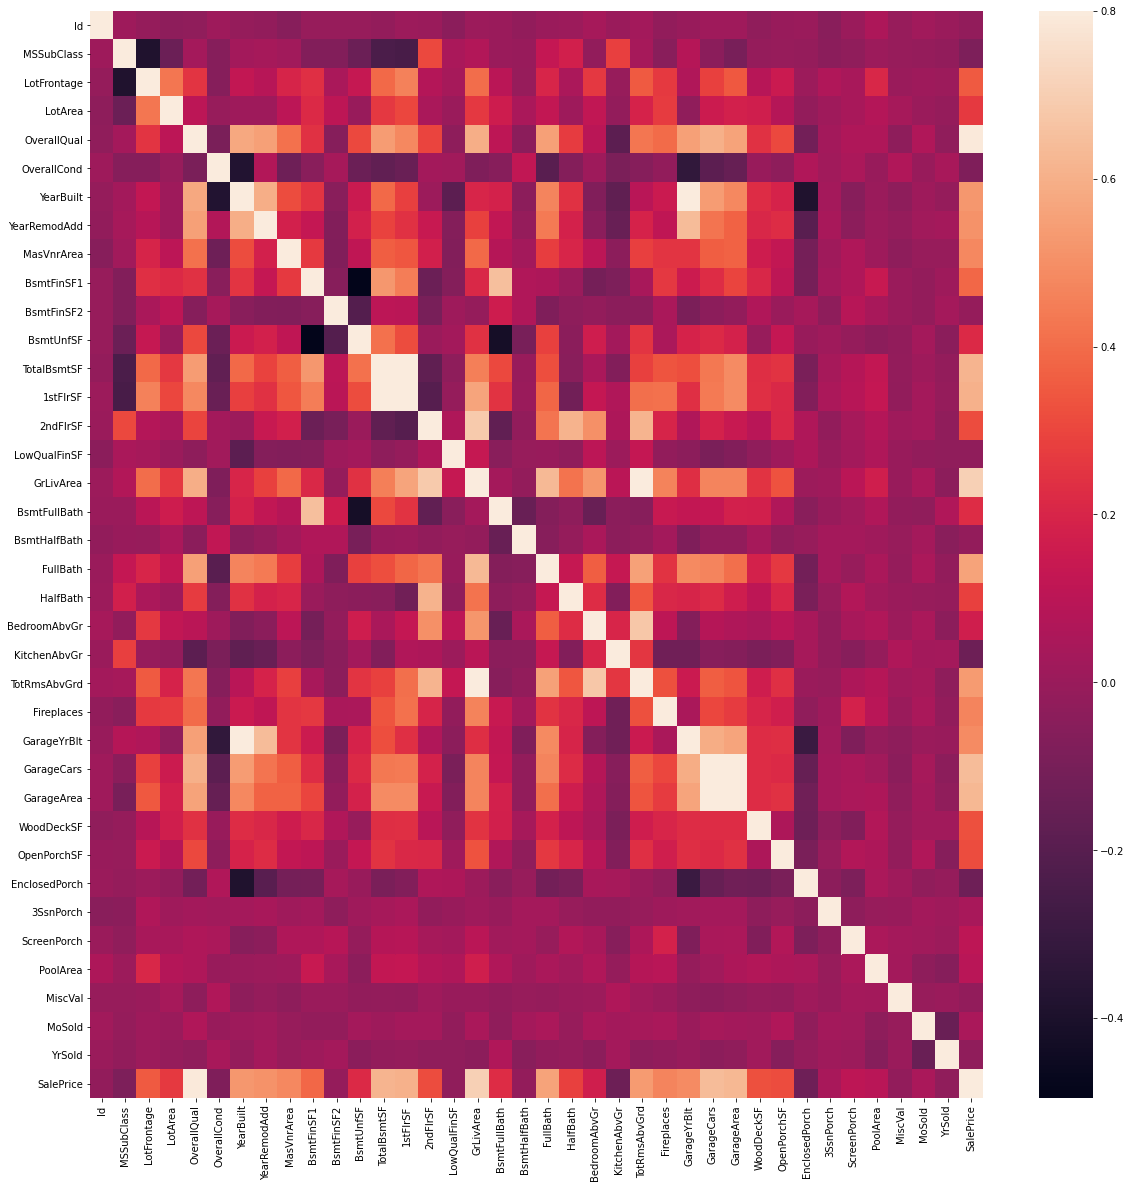

In [87]:
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize = (20,20))
sns.heatmap(corr, vmax=0.8)

In [88]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['MSZoning'] = label_encoder.fit_transform(df['MSZoning'])
df['MSZoning'].head()

0    3
1    3
2    3
3    3
4    3
Name: MSZoning, dtype: int32

In [43]:
tmp = df.info().index
tmp[0]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

AttributeError: 'NoneType' object has no attribute 'index'

In [90]:
SaleConditionVal = list(pd.value_counts(df['SaleCondition']).index)
SaleConditionVal

['Normal', 'Partial', 'Abnorml', 'Family', 'Alloca', 'AdjLand']

In [91]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

x = one_hot_encoder.fit_transform(df['SaleCondition'].values.reshape(-1,1)).toarray()

dfOneHot = pd.DataFrame(x, columns = ["SaleCondition_"+ x for x in SaleConditionVal]) 

#dfOneHot.head()

df = pd.concat([df, dfOneHot], axis = 1)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,YrSold,SaleType,SaleCondition,SalePrice,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,1,60,3,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,2008,WD,Normal,208500,0.0,0.0,0.0,0.0,1.0,0.0
1,2,20,3,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,2007,WD,Normal,181500,0.0,0.0,0.0,0.0,1.0,0.0
2,3,60,3,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,223500,0.0,0.0,0.0,0.0,1.0,0.0
3,4,70,3,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,2006,WD,Abnorml,140000,1.0,0.0,0.0,0.0,0.0,0.0
4,5,60,3,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,2008,WD,Normal,250000,0.0,0.0,0.0,0.0,1.0,0.0


In [97]:
dfOneHot.head()

,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Abnorml,SaleCondition_Family,SaleCondition_Alloca,SaleCondition_AdjLand
0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [133]:
import statsmodels.api as sm

def var_cal(df):
    vif_df = pd.DataFrame(columns = ['var', 'vif'])
    x_var_names = df.columns
    for i in range(x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop(x_var_names[i])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1 / (1 - r_squared), 2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'vif', axis = 0, inplace=False)

#var_cal(dfOneHot)

,var,vif
0,SaleCondition_Normal,1.0
1,SaleCondition_Partial,1.0
2,SaleCondition_Abnorml,1.0
3,SaleCondition_Family,1.0
4,SaleCondition_Alloca,1.0
5,SaleCondition_AdjLand,1.0


In [8]:
import statsmodels.api as sm

def var_cal(df):
    vif_df = pd.DataFrame(columns = ['var', 'vif'])
    x_var_names = df.columns
    for i in range(x_var_names.shape[0]):
        y = df[x_var_names[i]]
        x = df[x_var_names.drop(x_var_names[i])]
        r_squared = sm.OLS(y,x).fit().rsquared
        vif = round(1 / (1 - r_squared), 2)
        vif_df.loc[i] = [x_var_names[i], vif]
    return vif_df.sort_values(by = 'vif', axis = 0, inplace=False)

var_cal(df)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).